# XGBoost Tutorial

XGBoost is a common tree-based ensemble machine learning algorithm that uses a gradient boosting framework.
It is known for its performance and speed in various machine learning tasks, especially in structured/tabular data.

## Attempt 1

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Import the data

In [ ]:
data = pd.read_stata("/Users/keith/Documents/code/Intro to ML 2025/data/raw/usa_00005.dta")

y = data['inctot']

# all other variables are features
X = data.drop(columns=['inctot'])


### Prep Data for XGBoost

In [ ]:


print(X.shape)

# one hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=False)
print(X_encoded.shape)

# get rid of columns with almost all 0's
cols_to_keep = [col for col in X_encoded.columns if (X_encoded[col] != 0).mean() > 0.01]
X_encoded = X_encoded[cols_to_keep]

print(X_encoded.shape)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)



### Define XGBoost Model Hyperparameters


In [ ]:
params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 100,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'verbosity': 2
}

evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 10000
early_stopping_rounds = 50



### Train the Model

In [ ]:
bst = xgb.train(params,
                dtrain,
                num_round,
                evallist,
                early_stopping_rounds=early_stopping_rounds)

In [ ]:
# remove rows with missing target 9999999
mask = (y != 9999999) & (y > 0)
X = X[mask]
y = y[mask]


In [ ]:
len(y)


In [ ]:
X_encoded.shape



## Attempt 2

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Import Data

In [3]:
data = pd.read_stata("/Users/keith/Documents/code/Intro to ML 2025/data/raw/usa_00005.dta")

# subset to 10% of the data
data = data.sample(frac=0.1, random_state=42).reset_index(drop=True)

y = data['inctot']

# all other variables are features
X = data.drop(columns=['inctot'])


### Prep Data for XGBoost

In [4]:


print(X.shape)

# one hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=False)
print(X_encoded.shape)

# get rid of columns with almost all 0's
cols_to_keep = [col for col in X_encoded.columns if (X_encoded[col] != 0).mean() > 0.01]
X_encoded = X_encoded[cols_to_keep]

print(X_encoded.shape)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)



(340581, 143)
(340581, 11054)
(340581, 719)


### Define XGBoost Model Hyperparameters


In [5]:
params = {
    'eta': 1,
    'max_depth': 10,
    'min_child_weight': 100,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'verbosity': 2
}

evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 10000
early_stopping_rounds = 50



### Train the Model

In [6]:
bst = xgb.train(params,
                dtrain,
                num_round,
                evallist,
                early_stopping_rounds=early_stopping_rounds)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py:771: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-rmse:59569.04951	eval-rmse:58937.94701
[1]	train-rmse:56170.14800	eval-rmse:56476.16477
[2]	train-rmse:54461.01912	eval-rmse:55676.95448
[3]	train-rmse:53812.72418	eval-rmse:55531.83333
[4]	train-rmse:53379.33201	eval-rmse:55561.64615
[5]	train-rmse:52831.20465	eval-rmse:55268.86052
[6]	train-rmse:52350.22867	eval-rmse:55360.60226
[7]	train-rmse:52112.29465	eval-rmse:55370.02414
[8]	train-rmse:51840.61779	eval-rmse:55411.90183
[9]	train-rmse:51546.86723	eval-rmse:55550.32552
[10]	train-rmse:51342.80357	eval-rmse:55670.83096
[11]	train-rmse:51153.35437	eval-rmse:55658.02977
[12]	train-rmse:50762.25785	eval-rmse:55757.10963
[13]	train-rmse:50638.43264	eval-rmse:55852.91683
[14]	train-rmse:50484.02788	eval-rmse:55944.63216
[15]	train-rmse:50276.00652	eval-rmse:56121.35625
[16]	train-rmse:50103.50557	eval-rmse:56205.88558
[17]	train-rmse:49959.18487	eval-rmse:56324.36926
[18]	train-rmse:49781.65300	eval-rmse:56427.50969
[19]	train-rmse:49454.97409	eval-rmse:56692.47701
[20]	train

### Visualize the Results

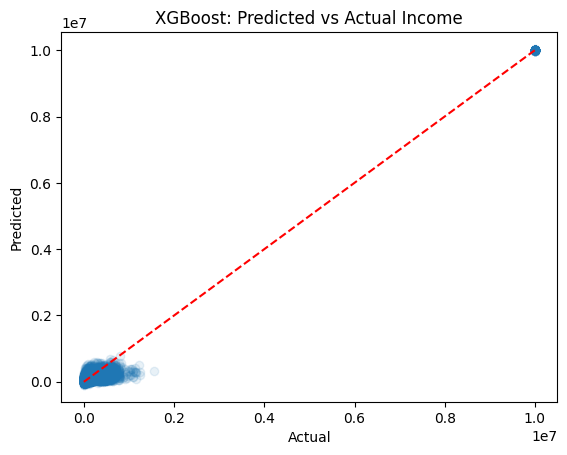

In [7]:
y_pred_plt = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))
y_test_plt = y_test

# y_plt_pred = np.log(y_pred)
# y_plt_test = np.log(y_test)

plt.scatter(y_test_plt, y_pred_plt, alpha=0.1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Predicted vs Actual Income")
plt.plot([y_test_plt.min(), y_test_plt.max()], [y_test_plt.min(), y_test_plt.max()], 'r--')  # diagonal line
plt.show()



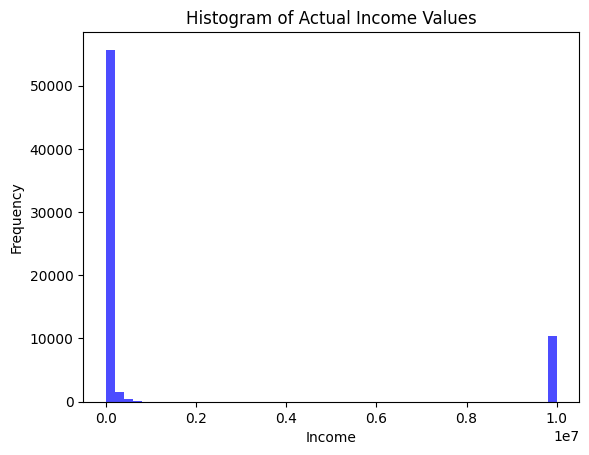

In [8]:
# histogram of actual values
plt.hist(y_test, bins=50, alpha=0.7, color='blue')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Histogram of Actual Income Values")
plt.show()

### Attempt 3

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Import Data

In [2]:
data = pd.read_stata("/Users/keith/Documents/code/Intro to ML 2025/data/raw/usa_00005.dta")

# subset to 10% of the data
data = data.sample(frac=0.1, random_state=42).reset_index(drop=True)

y = data['inctot']

# all other variables are features
X = data.drop(columns=['inctot'])

missing_val = 9999999
mask = (y != missing_val)
X = X[mask]
y = y[mask]


### Prep Data for XGBoost

In [3]:


print(X.shape)

# one hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=False)
print(X_encoded.shape)

# get rid of columns with almost all 0's
cols_to_keep = [col for col in X_encoded.columns if (X_encoded[col] != 0).mean() > 0.01]
X_encoded = X_encoded[cols_to_keep]

print(X_encoded.shape)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)



(289210, 143)
(289210, 11054)
(289210, 698)


### Define XGBoost Model Hyperparameters


In [5]:
params = {
    'eta': 1,
    'max_depth': 10,
    'min_child_weight': 100,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'verbosity': 2
}

evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 10000
early_stopping_rounds = 50



### Train the Model

In [6]:
bst = xgb.train(params,
                dtrain,
                num_round,
                evallist,
                early_stopping_rounds=early_stopping_rounds)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py:771: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-rmse:60178.21173	eval-rmse:62184.91684
[1]	train-rmse:58552.80688	eval-rmse:61554.00045
[2]	train-rmse:57455.28197	eval-rmse:61352.91194
[3]	train-rmse:56906.06051	eval-rmse:61438.76639
[4]	train-rmse:56255.31301	eval-rmse:61676.22042
[5]	train-rmse:55820.66251	eval-rmse:61706.68117
[6]	train-rmse:55245.29694	eval-rmse:61753.04508
[7]	train-rmse:55095.37608	eval-rmse:61782.97041
[8]	train-rmse:54766.10529	eval-rmse:61920.17282
[9]	train-rmse:54579.23905	eval-rmse:61953.56861
[10]	train-rmse:54359.32000	eval-rmse:62103.15453
[11]	train-rmse:54248.74836	eval-rmse:62157.47936
[12]	train-rmse:54063.78007	eval-rmse:62236.60004
[13]	train-rmse:53738.04384	eval-rmse:62305.38970
[14]	train-rmse:53562.02651	eval-rmse:62415.28081
[15]	train-rmse:53409.86610	eval-rmse:62444.72329
[16]	train-rmse:53089.52465	eval-rmse:62592.33992
[17]	train-rmse:52869.81476	eval-rmse:62690.63932
[18]	train-rmse:52623.25218	eval-rmse:62924.55837
[19]	train-rmse:52510.69997	eval-rmse:63029.53414
[20]	train

### Visualize the Results

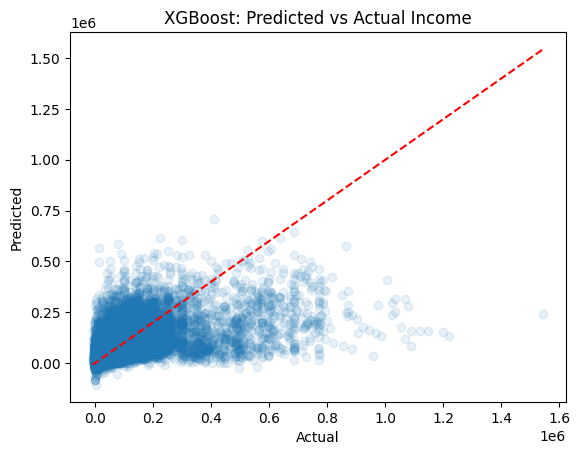

In [7]:
y_pred_plt = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))
y_test_plt = y_test

# y_plt_pred = np.log(y_pred)
# y_plt_test = np.log(y_test)

plt.scatter(y_test_plt, y_pred_plt, alpha=0.1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Predicted vs Actual Income")
plt.plot([y_test_plt.min(), y_test_plt.max()], [y_test_plt.min(), y_test_plt.max()], 'r--')  # diagonal line
plt.show()



## Hyperparameter Tuning

Training with eta=0.01
[0]	train-rmse:77892.08422	eval-rmse:78380.69830
[1]	train-rmse:77579.74015	eval-rmse:78082.12112
[2]	train-rmse:77272.47517	eval-rmse:77789.07225
[3]	train-rmse:76969.90043	eval-rmse:77500.25881
[4]	train-rmse:76672.13132	eval-rmse:77216.61044
[5]	train-rmse:76379.02100	eval-rmse:76938.15608
[6]	train-rmse:76092.09063	eval-rmse:76665.06433
[7]	train-rmse:75805.87067	eval-rmse:76393.85578
[8]	train-rmse:75527.43474	eval-rmse:76128.51025
[9]	train-rmse:75251.28835	eval-rmse:75865.89640
[10]	train-rmse:74981.26338	eval-rmse:75610.41662
[11]	train-rmse:74714.05747	eval-rmse:75357.13759
[12]	train-rmse:74450.34795	eval-rmse:75106.20823
[13]	train-rmse:74191.25094	eval-rmse:74861.35066
[14]	train-rmse:73935.78579	eval-rmse:74618.59989
[15]	train-rmse:73684.41218	eval-rmse:74381.44061
[16]	train-rmse:73436.16891	eval-rmse:74146.25604
[17]	train-rmse:73193.93707	eval-rmse:73917.11436
[18]	train-rmse:72952.44063	eval-rmse:73687.60544
[19]	train-rmse:72717.16240	eval-rmse

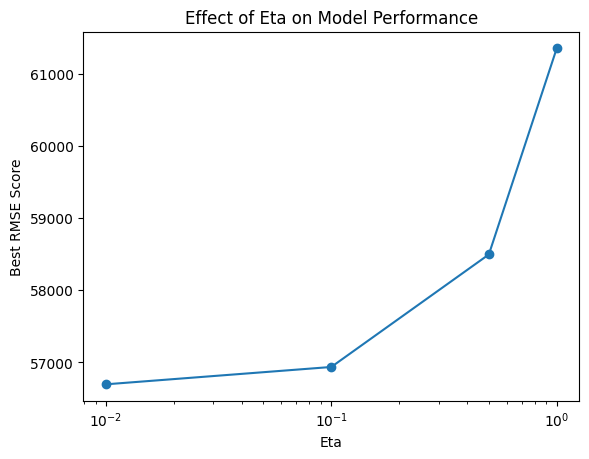

In [8]:
etas = [0.01, 0.1, 0.5, 1]

models = {}

for eta in etas:
    params = {
        'eta': eta,
        'max_depth': 10,
        'min_child_weight': 100,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'verbosity': 1
    }

    evallist = [(dtrain, 'train'), (dtest, 'eval')]
    num_round = 10000
    early_stopping_rounds = 50

    print(f"Training with eta={eta}")
    bst = xgb.train(params,
                    dtrain,
                    num_round,
                    evallist,
                    early_stopping_rounds=early_stopping_rounds)
    models[eta] = bst

scores = [models[eta].best_score for eta in etas]
plt.plot(etas, scores, marker='o')
plt.xscale('log')
plt.xlabel('Eta')
plt.ylabel('Best RMSE Score')
plt.title('Effect of Eta on Model Performance')
plt.show()
